### Q1. What is the Probability density function?

- In probability theory, a probability density function (PDF), or density of a continuous random variable, is a function whose value at any given sample (or point) in the sample space (the set of possible values taken by the random variable) can be interpreted as providing a relative likelihood that the value of the random variable would be equal to that sample. Probability density is the probability per unit length,


_____

### Q2. What are the types of Probability distribution?

#### Types of Probability Distribution
- The probability distribution is divided into two parts:
    - Discrete Probability Distributions
    - Continuous Probability Distributions

        - Discrete Probability Distribution :
            - Binomial Distribution
            - Bernoulli's Distribution
            - Poisson Distribution


        - Continuous Probability Distributions
            - Normal Distribution
            - Continuous Uniform Distribution
            - Log-Normal Distribution
            - Exponential Distribution

___________

### Q3. Write a Python function to calculate the probability density function of a normal distribution with given mean and standard deviation at a given point.

Text(0, 0.5, 'Probability Density')

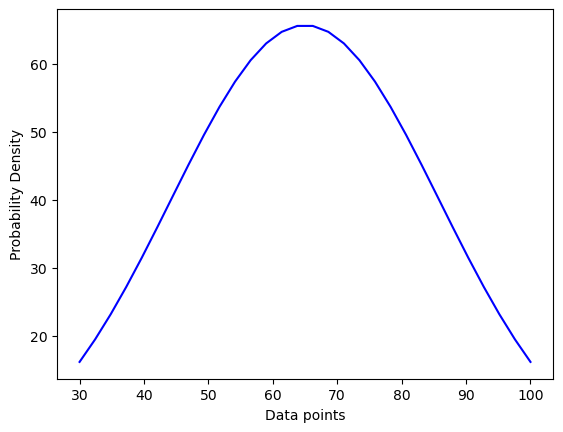

In [1]:
# Importing required libraries
 
import numpy as np
import matplotlib.pyplot as plt
 
# Creating a series of data of in range of 1-50.
x = np.linspace(30,100,30)
 
#Creating a Function.
def normal_dist(x , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density
 
#Calculate mean and Standard deviation.
mean = np.mean(x)
sd = np.std(x)
 
#Apply function to the data.
pdf = normal_dist(x,mean,sd)
 
#Plotting the Results
plt.plot(x,pdf , color = 'blue')
plt.xlabel('Data points')
plt.ylabel('Probability Density')

__________

### Q4. What are the properties of Binomial distribution? Give two examples of events where binomial distribution can be applied.

- Properties of Binomial Distribution
- The properties of the binomial distribution are:

    - There are only two distinct possible outcomes: true/false, success/failure, yes/no.
    - There is a fixed number of 'n' times repeated trials in a given experiment.
    - The probability of success or failure remains constant for each attempt/trial.
    - Only the successful attempts are calculated out of 'n' independent trials.
    - Every trial is an independent trial on its own, this means that the outcome of one trial has no effect on the outcome of another trial.
    - Example 
        - Toss a coin with n time,
        - Dise rolling

### Q5. Generate a random sample of size 1000 from a binomial distribution with probability of success 0.4 and plot a histogram of the results using matplotlib. 

In [2]:
# Dise

n_times = 10
result = []
for _ in range(n_times):
    result.append(np.random.randint(1,7))
result

[3, 6, 2, 3, 1, 3, 5, 1, 1, 4]

In [3]:
from scipy.stats import binom
p = 0.4
binomial_pmf = binom.pmf(result, n_times, p)

print(binomial_pmf)


[0.21499085 0.11147674 0.12093235 0.21499085 0.04031078 0.21499085
 0.20065812 0.04031078 0.04031078 0.25082266]


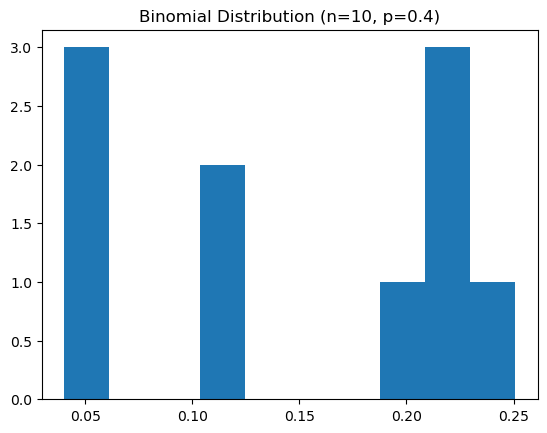

In [4]:
# plt.plot(result, binomial_pmf, color='blue')
plt.hist(binomial_pmf)
plt.title(f"Binomial Distribution (n={n_times}, p={p})")
plt.show()


__________

### Q6. Write a Python function to calculate the cumulative distribution function of a Poisson distribution with given mean at a given point.

In [5]:
import seaborn as sns
data =  sns.load_dataset('taxis')
data.head(2)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan


In [12]:
# Arrange the data
data['hour'] = data['pickup'].dt.hour
df = data[['hour', 'fare']]  # Filtering the data
df = df.sort_values(by = ['hour'])  #Sorting the Data
df = df.groupby('hour').mean()  # Averaging thr fare for hoursly concept
df.head()

,fare
hour,
0,14.039024
1,12.150000
2,12.069307
3,12.470149
4,15.447368


<AxesSubplot: xlabel='hour', ylabel='fare'>

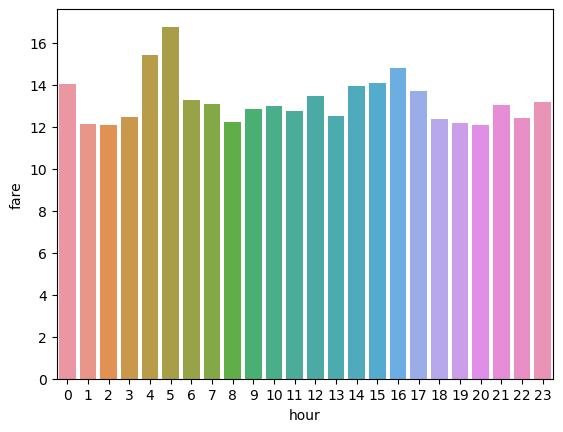

In [17]:
x=df.index
y= df['fare']
sns.barplot(data = df, x= x, y=y)

<AxesSubplot: xlabel='hour'>

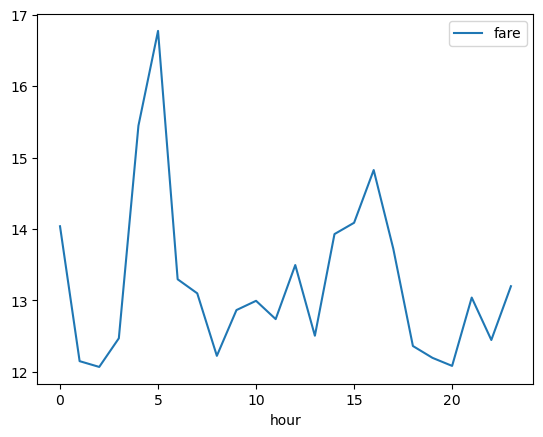

In [21]:
sns.lineplot(df)

In [18]:
mu = np.mean(df.index)
mu

11.5

In [20]:
import math

# Step 1: Define the event of interest
event = "number of customers riding a taxis in given time"

# Step 2: Calculate the mean or rate parameter

# data_set = [10, 15, 5, 12, 8, 9, 11, 14, 6, 7, 13, 10, 16, 11, 9, 8, 12, 14, 7, 10, 13, 15, 10, 11, 9, 13, 12, 8, 10, 7]
data_set = df['fare']
lamda = sum(data_set) / len(data_set)
print("Mean or rate parameter (λ) for", event, "=", lamda)

# Step 3: Define the probability mass function
def poisson_pmf(k, lamda):
    return (lamda**k * math.exp(-lamda)) / math.factorial(k)

# Step 4: Calculate the probability of observing the event of interest
k = 15
pmf = poisson_pmf(k, lamda)
print("Probability of observing", k, event, "on average =", pmf)

Mean or rate parameter (λ) for number of customers riding a taxis in given time = 13.252875263607551
Probability of observing 15 number of customers riding a taxis in given time on average = 0.091727899478656


In [22]:
sorted_data = sorted(df['fare'])
sorted_data

[12.069306930693068,
 12.083559782608695,
 12.15,
 12.196231527093596,
 12.22447284345048,
 12.36220623501199,
 12.446448598130841,
 12.470149253731343,
 12.506297468354429,
 12.738847457627118,
 12.865423197492163,
 12.994984615384615,
 13.040478873239437,
 13.099728506787331,
 13.19935810810811,
 13.296760563380282,
 13.496017964071857,
 13.723994845360824,
 13.929555555555556,
 14.039024390243902,
 14.088090909090909,
 14.826190476190478,
 15.447368421052632,
 16.774509803921568]

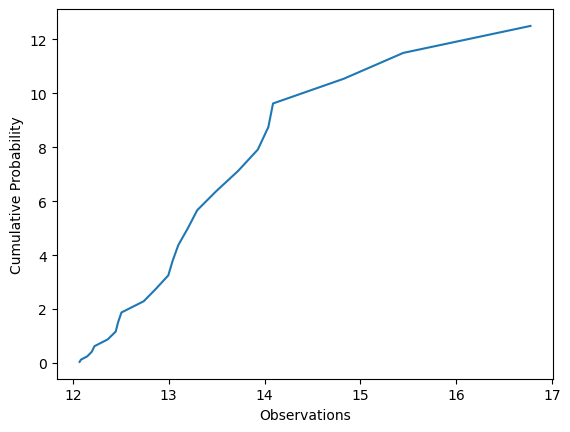

In [23]:
# Step 2: Calculate the probability of each observation

n = len(sorted_data)
probabilities = [(i+1)/n for i in range(n)]  # rank starting from 1, divide by total number of observations

# Step 3: Calculate the cumulative sum of the probabilities
cdf = np.cumsum(probabilities)

# Plot the CDF
plt.plot(sorted_data, cdf)
plt.xlabel('Observations')
plt.ylabel('Cumulative Probability')
plt.show()

___________

### Q7. How Binomial distribution different from Poisson distribution?

    - Binomial distribution describes the distribution of binary data from a finite sample. Thus it gives the probability of getting r events out of n trials. 
    - Poisson distribution describes the distribution of binary data from an infinite sample. Thus it gives the probability of getting r events in a population.

### Q8. Generate a random sample of size 1000 from a Poisson distribution with mean 5 and calculate the sample mean and variance.

In [24]:
import numpy as np

np.random.seed(42) # set the seed for reproducibility
sample = np.random.poisson(lam=5, size=1000)
# print(sample)
sample_mean = np.mean(sample)
sample_var = np.var(sample, ddof=1) # set ddof=1 for unbiased variance estimation

print("Sample mean:", sample_mean)
print("Sample variance:", sample_var)


Sample mean: 4.985
Sample variance: 5.001776776776777


### Q9. How mean and variance are related in Binomial distribution and Poisson distribution?

    - mean = n*p
    - variance = n*p*(1-p)
where n is the number of trials and p is the probability of success on each trial. The formula shows that the variance of the Binomial distribution depends on both the number of trials and the probability of success. As p approaches 0 or 1, the variance becomes smaller, since there is less variability in the outcomes.

In the Poisson distribution, the mean and variance are also related, but in a slightly different way. Specifically, in the Poisson distribution, the mean and variance are equal:

    - mean = variance = lambda
where lambda is the parameter of the Poisson distribution, which represents both the mean and the variance. This means that the Poisson distribution is a special case of the Binomial distribution, where the number of trials approaches infinity and the probability of success approaches 0, such that lambda = n*p remains constant.

In summary, the Binomial distribution and Poisson distribution are related in terms of how their mean and variance are related. In the Binomial distribution, the variance depends on both the number of trials and the probability of success, while in the Poisson distribution, the mean and variance are equal and determined solely by the parameter lambda.

### Q10. In normal distribution with respect to mean position, where does the least frequent data appear?

- In Normaal distribution property "The Empirical Rule" says <-3 and >+3 of deviation has least values

___________